<a href="https://colab.research.google.com/github/MursilKhan/Customer-Segmentation/blob/main/Customer_Segmentatiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation


we will use K-Means Clusterring here.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
#data collection

#Mall_customers dataset from kaggle



In [ ]:
#importing data


customer_data=pd.read_csv("/content/Mall_Customers.csv")


In [ ]:
customer_data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
 #we can drop columns
 X=customer_data.iloc[:,[3,4]].values


In [ ]:
#print(X)
print(X.shape)

(200, 2)


In [ ]:

Annual_income=[]
Spending_limit=[]
for j in range(200):
    Annual_income.append(X[j,0])
    Spending_limit.append(X[j,1])
print(Annual_income)
print(Spending_limit)





[15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33, 33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 69, 70, 70, 71, 71, 71, 71, 71, 71, 72, 72, 73, 73, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 81, 81, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 93, 93, 97, 97, 98, 98, 99, 99, 101, 101, 103, 103, 103, 103, 113, 113, 120, 120, 126, 126, 137, 137]
[39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98, 35, 73, 5, 73, 14, 82, 32, 61, 31, 87, 4, 73, 4, 92, 14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47

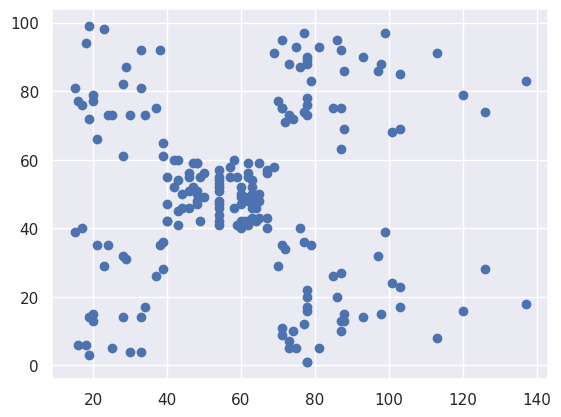

In [ ]:
plt.scatter(Annual_income,Spending_limit)

In [ ]:
#now our dataset is ready


In [ ]:
#using WCSS (within cluster sum of values)

wcss=[]

for  i in range(1,10):
                kmeans=KMeans(n_clusters=i, init='k-means++',n_init=1,random_state=20)
                kmeans.fit(X)
                wcss.append(kmeans.inertia_)

In [ ]:
#elbow method

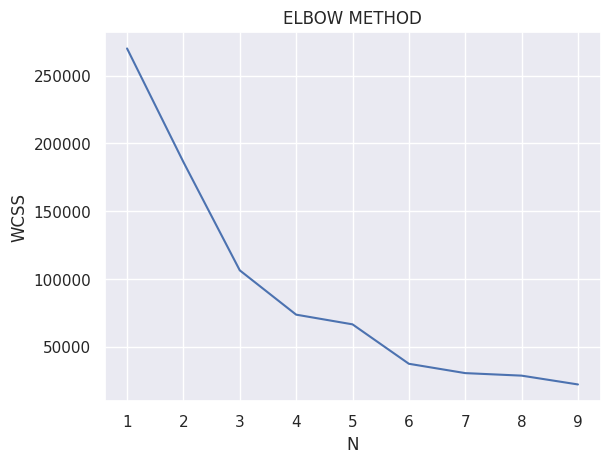

In [ ]:
sns.set()
plt.plot(range(1,10),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('N')
plt.ylabel("WCSS")
plt.show()
df=pd.DataFrame(wcss)

In [ ]:
import plotly.express as px

fig=px.line(df,x=[1,2,3,4,5,6,7,8,9],y=wcss)
fig.show()
#print (fig)

In [ ]:
#two elbows at n=4 & n=6
#so we always select the higher no.
#therefore n=6

In [ ]:
#Model Training

In [ ]:
kmeans=KMeans(n_clusters=6,init="k-means++",n_init=1,random_state=14)


Y=kmeans.fit_predict(X)
print(Y)
#print(X)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 5 2 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 0 5 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing the Model

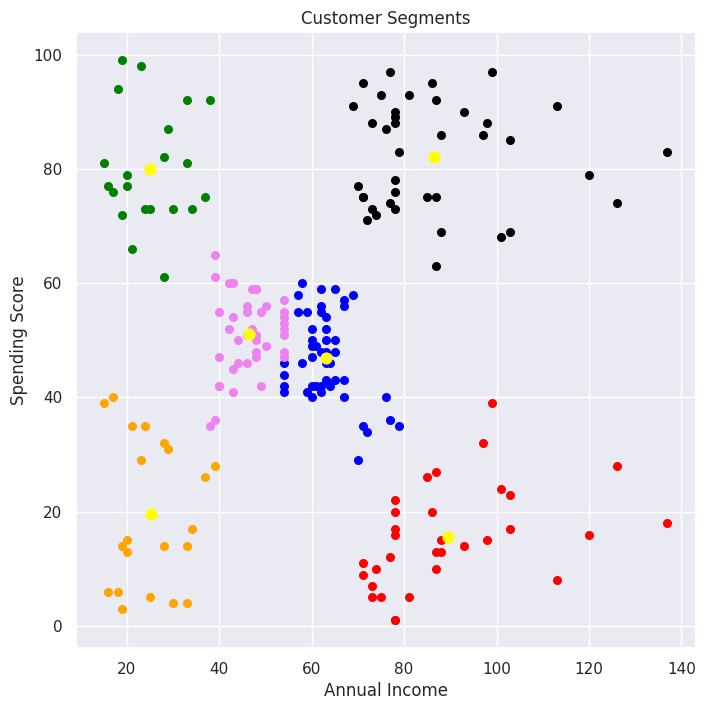

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[Y==0,0],X[Y==0,1],s=30,c='blue',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=30,c='black',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=30,c='green',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=30,c='red',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=30,c='orange',label='Cluster 5')
plt.scatter(X[Y==5,0],X[Y==5,1],s=30,c='violet',label='Cluster 6')
# X[Y==0,0] means  wherever Y==0 in Y dataset take those values for the first coordinate.... and 0 for the coloumn to take the"Annual income" column
#therefore the above means X[wherever Y==0,"Annual Income"column] similarly for X[Y==0,1] will be X[wherever Y==0,"Spending limit"column]

# showwing centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,c='yellow',label='Centroid')


plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()